In [2]:
import os, cv2, random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
%matplotlib inline 
from keras.models import Model
from keras.models import Sequential
from keras.models import load_model 
from keras.layers import Input, Dropout, Flatten, Convolution2D, MaxPooling2D, Dense, Activation, ZeroPadding2D, Conv2D
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils

from keras.applications.vgg16 import VGG16  
from keras.preprocessing import image  
from keras.applications.vgg16 import preprocess_input  
from keras.preprocessing.image import ImageDataGenerator  
import numpy as np 

from keras import backend as K  
import h5py 

import glob  
from PIL import Image

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from pandas_ml import ConfusionMatrix

from pyimagesearch.preprocessing import ImageToArrayPreprocessor
from pyimagesearch.preprocessing import AspectAwarePreprocessor
from pyimagesearch.datasets import SimpleDatasetLoader
from pyimagesearch.nn.conv import FCHeadNet

Using TensorFlow backend.


In [4]:
def lenet_5(input_shape=(200,300,3),classes=10):
    X_input=Input(input_shape)
    X=ZeroPadding2D((1,1))(X_input)
    X=Conv2D(6,(5,5),strides=(1,1),padding='valid',name='conv1')(X)
    X=Activation('tanh')(X)
    X=MaxPooling2D((2,2),strides=(2,2))(X)
    X=Conv2D(6,(5,5),strides=(1,1),padding='valid',name='conv2')(X)
    X=Activation('tanh')(X)
    X=MaxPooling2D((2,2),strides=(2,2))(X)
    X=Flatten()(X)
    X=Dense(64,activation='tanh',name='fc1')(X)
    X=Dense(64,activation='tanh',name='fc2')(X)
    X=Dense(10,activation='softmax')(X)
    model=Model(inputs=X_input,outputs=X,name='lenet_5')
    return model

In [5]:
model=lenet_5(input_shape=(200,300,3),classes=10)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200, 300, 3)       0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 202, 302, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 198, 298, 6)       456       
_________________________________________________________________
activation_1 (Activation)    (None, 198, 298, 6)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 99, 149, 6)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 95, 145, 6)        906       
_________________________________________________________________
activation_2 (Activation)    (None, 95, 145, 6)        0         
__________

In [43]:
model_vgg16_conv = VGG16(weights='imagenet', include_top=False)
#model_vgg16_conv.summary()

In [44]:
ROWS = 200
COLS = 300

my_input = Input(shape=(7947, 200, 300, 3), name = 'image_input')

if K.image_data_format() == "channels_first":
    input_shape = (3, ROWS, COLS)
else:
    input_shape = (ROWS, COLS, 3)

input_crop = Input(shape=input_shape)
print(input_crop)

Tensor("input_3:0", shape=(?, 200, 300, 3), dtype=float32)


In [45]:
output_vgg16_conv = model_vgg16_conv(input_crop)

In [46]:
x = Flatten(name='flatten')(output_vgg16_conv)
x = Dense(512, activation='relu', name='fc1')(x)
x = Dense(256, activation='relu', name='fc2')(x)
x = Dense(128, activation='relu', name='fc3')(x)
x = Dense(2, activation='softmax', name='predictions')(x)
#sigmoid softmax
optimizer = 'adam'
#optimizer = RMSprop(lr=1e-4)
#optimizer = 'sgd'
#objective = 'categorical_crossentropy'
#objective = 'sparse_categorical_crossentropy'
objective = 'binary_crossentropy'

In [47]:
my_model = Model(input=input_crop, output=x)
my_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 200, 300, 3)       0         
_________________________________________________________________
vgg16 (Model)                multiple                  14714688  
_________________________________________________________________
flatten (Flatten)            (None, 27648)             0         
_________________________________________________________________
fc1 (Dense)                  (None, 512)               14156288  
_________________________________________________________________
fc2 (Dense)                  (None, 256)               131328    
_________________________________________________________________
fc3 (Dense)                  (None, 128)               32896     
_________________________________________________________________
predictions (Dense)          (None, 2)                 258       
Total para

/home/tku/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("pr..., inputs=Tensor("in...)`
  if __name__ == '__main__':


In [48]:
my_model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])

In [49]:
baseModel = VGG16(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(200, 300, 3)))

In [50]:
headModel = FCHeadNet.build(baseModel, 2, 512)

In [51]:
model = Model(inputs=baseModel.input, outputs=headModel)

In [52]:
for layer in baseModel.layers:
	layer.trainable = False

In [53]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 200, 300, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 75, 128)       0         
__________

In [13]:
#sigmoid softmax
optimizer = 'adam'
#optimizer = RMSprop(lr=1e-4)
#optimizer = 'sgd'
objective = 'categorical_crossentropy'
#objective = 'sparse_categorical_crossentropy'
#objective = 'binary_crossentropy'

model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])

In [8]:
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    rescale= 1/255)

train_generator = train_datagen.flow_from_directory(
        'one_movie_one_poster/train/',
        target_size=(200, 300),  #可以在此指定要rescale的尺寸
        batch_size=80)

Found 7947 images belonging to 10 classes.


In [9]:
test_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = test_datagen.flow_from_directory(
        'one_movie_one_poster/validaiton/',
        target_size=(200, 300),  #可以在此指定要rescale的尺寸
        batch_size=80)

Found 1291 images belonging to 10 classes.


In [10]:
#test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'one_movie_one_poster/test/',
        target_size=(200, 300),  #可以在此指定要rescale的尺寸
        batch_size=80)

Found 2091 images belonging to 10 classes.


In [11]:
nb_train_samples = 7947
nb_validation_samples = 1291
nb_test_samples = 2091

In [14]:
train_history = model.fit_generator(
                train_generator,
                steps_per_epoch=32,
                epochs=30,
                validation_data=validation_generator,
                validation_steps=32)

Epoch 1/30
32/32 [==============================] - 201s - loss: 2.4546 - acc: 0.0879 - val_loss: 2.3254 - val_acc: 0.0980
Epoch 2/30
32/32 [==============================] - 140s - loss: 2.3120 - acc: 0.0992 - val_loss: 2.3147 - val_acc: 0.1061
Epoch 3/30
32/32 [==============================] - 140s - loss: 2.3133 - acc: 0.0988 - val_loss: 2.3122 - val_acc: 0.1020
Epoch 4/30
32/32 [==============================] - 125s - loss: 2.3104 - acc: 0.0937 - val_loss: 2.3070 - val_acc: 0.0995
Epoch 5/30
32/32 [==============================] - 125s - loss: 2.3094 - acc: 0.1016 - val_loss: 2.3091 - val_acc: 0.1032
Epoch 6/30
32/32 [==============================] - 127s - loss: 2.3129 - acc: 0.1004 - val_loss: 2.3051 - val_acc: 0.1053
Epoch 7/30
32/32 [==============================] - 128s - loss: 2.3092 - acc: 0.1030 - val_loss: 2.3150 - val_acc: 0.0999
Epoch 8/30
32/32 [==============================] - 124s - loss: 2.3092 - acc: 0.0973 - val_loss: 2.3126 - val_acc: 0.1032
Epoch 9/30
32/32

In [15]:
def show_train_history(history, train, validation):
    plt.plot(history.history[train])
    plt.plot(history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

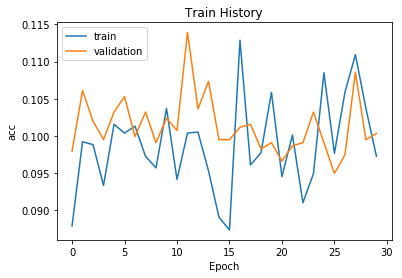

In [16]:
show_train_history(train_history, 'acc', 'val_acc')

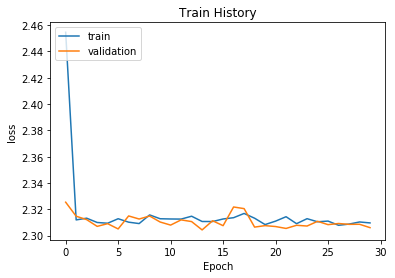

In [17]:
show_train_history(train_history, 'loss', 'val_loss')

In [18]:
batch_size = 80
score_test = model.evaluate_generator(test_generator, nb_test_samples/batch_size, workers=12)
score_test

[2.305611571303285, 0.10760401725940075]

In [19]:
predictions_test = np.argmax(model.predict_generator(test_generator, nb_test_samples/batch_size, workers=12, verbose=1),axis=1)

27/26 [==============================] - 17s    


In [20]:
print(len(predictions_test))

2091


In [21]:
predictions_test

array([1, 6, 1, ..., 1, 1, 1])

In [22]:
n_label_predict_test = test_generator.classes

In [23]:
confusion_matrix = ConfusionMatrix(n_label_predict_test, predictions_test)
confusion_matrix

/home/tku/anaconda3/envs/py35/lib/python3.5/site-packages/pandas_ml/confusion_matrix/abstract.py:66: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  df = df.loc[idx, idx.copy()].fillna(0)  # if some columns or rows are missing


Predicted   0     1  2  3  4  5    6  7  8  9  __all__
Actual                                                
0           2   206  0  0  0  0   20  0  0  0      228
1           4   190  0  0  0  0   13  0  0  0      207
2           9   182  0  0  0  0   16  0  0  0      207
3           3   195  0  0  0  0    9  0  0  0      207
4           5   180  0  0  0  0   22  0  0  0      207
5           5   190  0  0  0  0   12  0  0  0      207
6           6   180  0  0  0  1   20  0  0  0      207
7           4   187  0  0  0  0   16  0  0  0      207
8           7   182  0  0  0  0   18  0  0  0      207
9           6   192  0  0  0  0    9  0  0  0      207
__all__    51  1884  0  0  0  1  155  0  0  0     2091

In [24]:
from sklearn.metrics import classification_report
print(classification_report(n_label_predict_test,predictions_test, target_names=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8','R9']))
#ConfusionMatrix(labels_test, n_label_predict_test)

             precision    recall  f1-score   support

         R0       0.04      0.01      0.01       228
         R1       0.10      0.92      0.18       207
         R2       0.00      0.00      0.00       207
         R3       0.00      0.00      0.00       207
         R4       0.00      0.00      0.00       207
         R5       0.00      0.00      0.00       207
         R6       0.13      0.10      0.11       207
         R7       0.00      0.00      0.00       207
         R8       0.00      0.00      0.00       207
         R9       0.00      0.00      0.00       207

avg / total       0.03      0.10      0.03      2091



/home/tku/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
df = pd.DataFrame({'predict':predictions_test,
     'labels':n_label_predict_test})
df.corr()

,labels,predict
labels,1.000000,-0.010468
predict,-0.010468,1.000000


In [ ]:
model.save('xxxxx.h5')

#